In [1]:
!pip install salesforce-merlion

  Using cached GitPython-3.1.44-py3-none-any.whl.metadata (13 kB)
  Using cached py4j-0.10.9.8-py2.py3-none-any.whl.metadata (1.3 kB)
  Using cached gitdb-4.0.12-py3-none-any.whl.metadata (1.2 kB)
  Using cached smmap-5.0.2-py3-none-any.whl.metadata (4.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 2.4 MB/s eta 0:00:0000:0100:010m
Using cached GitPython-3.1.44-py3-none-any.whl (207 kB)
Using cached py4j-0.10.9.8-py2.py3-none-any.whl (202 kB)
Using cached gitdb-4.0.12-py3-none-any.whl (62 kB)
Using cached smmap-5.0.2-py3-none-any.whl (24 kB)
DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [44]:
import pandas as pd
from merlion.utils import TimeSeries

# Assuming your data and values are already defined
df = pd.DataFrame({"timestamp": data, "value": values})

# Convert timestamp to datetime if it's not already
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Set timestamp as index
df.set_index('timestamp', inplace=True)

# Now create the TimeSeries object
ts = TimeSeries.from_pd(df)
print(ts)


ValueError: All arrays must be of the same length

In [4]:
from merlion.models.forecast.arima import Arima
from merlion.evaluate.forecast import ForecastEvaluator
# Initialize an ARIMA model
config = Arima.Config(order=(5, 1, 0))  # ARIMA(p=5, d=1, q=0)
model = Arima(config)

AttributeError: type object 'Arima' has no attribute 'Config'

In [45]:
import pandas as pd
import numpy as np
from merlion.utils import TimeSeries
from merlion.models.forecast.arima import Arima
from merlion.evaluate.forecast import ForecastEvaluator

# Create some sample data
dates = pd.date_range(start='2020-01-01', end='2022-12-31', freq='D')
values = np.random.randn(len(dates)).cumsum()  # random walk

# Create a DataFrame
df = pd.DataFrame({'timestamp': dates, 'value': values})
df.set_index('timestamp', inplace=True)


In [48]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import norm
import logging

from merlion.utils.time_series import TimeSeries
from merlion.evaluate.forecast import ForecastMetric
from merlion.models.automl.autosarima import AutoSarima, AutoSarimaConfig
from merlion.models.automl.seasonality_mixin import SeasonalityLayer
from merlion.models.forecast.sarima import Sarima

from ts_datasets.forecast import M4

logging.basicConfig(level=logging.DEBUG)

time_series, metadata = M4("Hourly")[0]
train_data = TimeSeries.from_pd(time_series[metadata.trainval])
test_data = TimeSeries.from_pd(time_series[~metadata.trainval])

# Visualize the time series and draw a dotted line to indicate the train/test split
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.plot(time_series)
ax.axvline(metadata[metadata.trainval].index[-1], ls="--", lw="2", c="k")
plt.show()

# Print the length of training data and test data
print(f"{len(train_data)} points in train split, "
      f"{len(test_data)} points in test split.")

# Specify the configuration of AutoSarima with approximation
config1 = AutoSarimaConfig(max_forecast_steps=len(train_data), order=("auto", "auto", "auto"),
                           seasonal_order=("auto", "auto", "auto", "auto"), approximation=True, maxiter=5)
model1  = SeasonalityLayer(model = AutoSarima(model = Sarima(config1)))

# Model training
train_pred, train_err = model1.train(
    train_data, train_config={"enforce_stationarity": True,"enforce_invertibility": True})

# Model forecasting
forecast1, stderr1 = model1.forecast(len(test_data))

# Model evaluation
smape1 = ForecastMetric.sMAPE.value(ground_truth=test_data, predict=forecast1)
print(f"Full AutoSarima with approximation sMAPE is {smape1:.4f}")

ModuleNotFoundError: No module named 'merlion.models.automl.seasonality_mixin'

In [33]:
# Train the model on the dataset
model.train(ts)
# Evaluate the model's performance
evaluator = ForecastEvaluator(model, ts)
forecast, error = evaluator.get_predicted_time_series()
print(forecast)

Exception: Prophet object can only be fit once. Instantiate a new object.

In [19]:
import pandas as pd
import numpy as np
from merlion.utils import TimeSeries
from merlion.models.forecast.prophet import Prophet, ProphetConfig
from merlion.evaluate.forecast import ForecastEvaluator

# Create some sample data
dates = pd.date_range(start='2020-01-01', end='2022-12-31', freq='D')
values = np.random.randn(len(dates)).cumsum()  # random walk

# Create a DataFrame
df = pd.DataFrame({'timestamp': dates, 'value': values})
df.set_index('timestamp', inplace=True)

# Convert to Merlion TimeSeries
ts = TimeSeries.from_pd(df)

# Split the data into train and test sets
train_data = ts[:int(0.8 * len(ts))]
test_data = ts[int(0.8 * len(ts)):]

# Initialize a Prophet configuration
prophet_config = ProphetConfig()

# Initialize a Prophet model with the configuration
model = Prophet(prophet_config)

# Train the model
model.train(train_data)

# Make predictions
prediction = model.forecast(n_periods=len(test_data))

# Evaluate the model
evaluator = ForecastEvaluator(model, train_data, test_data)
eval_result = evaluator.evaluate()

print(eval_result)


16:50:15 - cmdstanpy - INFO - Chain [1] start processing
16:50:16 - cmdstanpy - INFO - Chain [1] done processing


TypeError: forecast() got an unexpected keyword argument 'n_periods'

In [20]:
import inspect

# After creating and training the model
print(inspect.signature(model.forecast))


(time_stamps: Union[int, List[int]], time_series_prev: merlion.utils.time_series.TimeSeries = None, exog_data: merlion.utils.time_series.TimeSeries = None, return_iqr: bool = False, return_prev: bool = False) -> Union[Tuple[merlion.utils.time_series.TimeSeries, Union[merlion.utils.time_series.TimeSeries, NoneType]], Tuple[merlion.utils.time_series.TimeSeries, merlion.utils.time_series.TimeSeries, merlion.utils.time_series.TimeSeries]]


In [21]:
import pandas as pd
import numpy as np
from merlion.utils import TimeSeries
from merlion.models.forecast.prophet import Prophet, ProphetConfig
from merlion.evaluate.forecast import ForecastEvaluator

# Create some sample data
dates = pd.date_range(start='2020-01-01', end='2022-12-31', freq='D')
values = np.random.randn(len(dates)).cumsum()  # random walk

# Create a DataFrame
df = pd.DataFrame({'timestamp': dates, 'value': values})
df.set_index('timestamp', inplace=True)

# Convert to Merlion TimeSeries
ts = TimeSeries.from_pd(df)

# Split the data into train and test sets
train_data = ts[:int(0.8 * len(ts))]
test_data = ts[int(0.8 * len(ts)):]

# Initialize a Prophet configuration
prophet_config = ProphetConfig()

# Initialize a Prophet model with the configuration
model = Prophet(prophet_config)

# Train the model
model.train(train_data)

# Get the last timestamp from the training data
last_timestamp = train_data.time_stamps[-1]

# Create a sequence of future timestamps
future_timestamps = pd.date_range(start=last_timestamp, periods=len(test_data)+1, freq='D')[1:]

# Make predictions
prediction = model.forecast(future_timestamps)

# Evaluate the model
evaluator = ForecastEvaluator(model, train_data, test_data)
eval_result = evaluator.evaluate()

print(eval_result)


16:51:11 - cmdstanpy - INFO - Chain [1] start processing
16:51:12 - cmdstanpy - INFO - Chain [1] done processing


AssertionError: Expected `time_stamps` to be between 2022-05-25 00:00:00 and 1970-08-09 00:00:01.653436800, but `time_stamps` ranges from 1970-01-02 00:00:01.653436800 to 1970-08-09 00:00:01.653436800

NameError: name 'forecast' is not defined

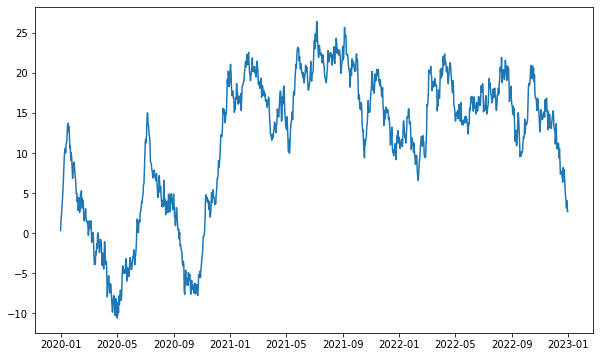

In [30]:
import matplotlib.pyplot as plt
# Plot the original data and forecast
plt.figure(figsize=(10, 6))
plt.plot(ts.to_pd(), label="Actual")
plt.plot(forecast.to_pd(), label="Forecast", linestyle="--")
plt.fill_between(
    forecast.time_stamps,
    forecast.values - error.values,
    forecast.values + error.values,
    color="gray",
    alpha=0.3,
    label="Confidence Interval",
)
plt.legend()
plt.show()

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from merlion.utils import TimeSeries
from merlion.models.forecast.prophet import Prophet, ProphetConfig
from merlion.evaluate.forecast import ForecastEvaluator, ForecastEvaluatorConfig

# Create some sample data
dates = pd.date_range(start='2020-01-01', end='2022-12-31', freq='D')
values = np.random.randn(len(dates)).cumsum()  # random walk

# Create a DataFrame
df = pd.DataFrame({'timestamp': dates, 'value': values})
df.set_index('timestamp', inplace=True)

# Convert to Merlion TimeSeries
ts = TimeSeries.from_pd(df)

# Split the data into train and test sets
train_data = ts[:int(0.8 * len(ts))]
test_data = ts[int(0.8 * len(ts)):]

# Initialize a Prophet configuration
prophet_config = ProphetConfig()

# Initialize a Prophet model with the configuration
model = Prophet(prophet_config)

# Train the model
model.train(train_data)

# Get the last timestamp from the training data
last_timestamp = train_data.time_stamps[-1]

# Create a sequence of future timestamps
future_timestamps = np.arange(
    last_timestamp + 86400,  # Start from the day after last training timestamp
    last_timestamp + 86400 * (len(test_data) + 1),
    86400  # Increment by one day (86400 seconds)
)

# Make predictions
forecast, error = model.forecast(time_stamps=future_timestamps, return_iqr=True)

# Create a ForecastEvaluatorConfig
eval_config = ForecastEvaluatorConfig()

# Initialize the evaluator with the model and config
evaluator = ForecastEvaluator(model, eval_config)

# Evaluate the model
eval_result = evaluator.evaluate(ground_truth=test_data, predict=forecast)

print(eval_result)

# Plot the original data and forecast
plt.figure(figsize=(12, 6))
plt.plot(ts.to_pd(), label="Actual", color='blue')
plt.plot(forecast.to_pd(), label="Forecast", linestyle="--", color='red')
plt.fill_between(
    forecast.to_pd().index,
    (forecast - error).to_pd().iloc[:, 0],
    (forecast + error).to_pd().iloc[:, 0],
    color="gray",
    alpha=0.3,
    label="Confidence Interval",
)
plt.title("Time Series Forecast")
plt.xlabel("Date")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


16:56:49 - cmdstanpy - INFO - Chain [1] start processing
16:56:50 - cmdstanpy - INFO - Chain [1] done processing


ValueError: too many values to unpack (expected 2)

16:57:48 - cmdstanpy - INFO - Chain [1] start processing
16:57:49 - cmdstanpy - INFO - Chain [1] done processing


119.27827530797947


AttributeError: 'tuple' object has no attribute 'to_pd'

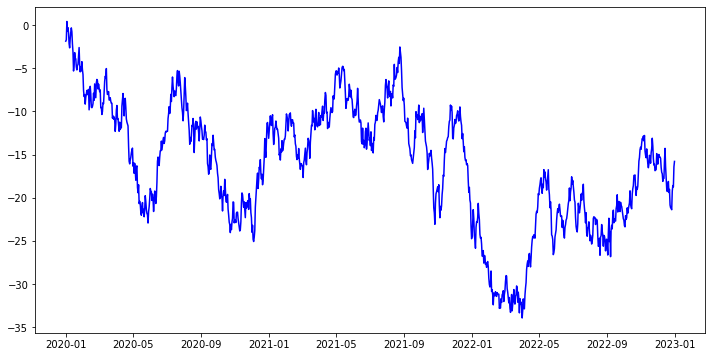

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from merlion.utils import TimeSeries
from merlion.models.forecast.prophet import Prophet, ProphetConfig
from merlion.evaluate.forecast import ForecastEvaluator, ForecastEvaluatorConfig

# Create some sample data
dates = pd.date_range(start='2020-01-01', end='2022-12-31', freq='D')
values = np.random.randn(len(dates)).cumsum()  # random walk

# Create a DataFrame
df = pd.DataFrame({'timestamp': dates, 'value': values})
df.set_index('timestamp', inplace=True)

# Convert to Merlion TimeSeries
ts = TimeSeries.from_pd(df)

# Split the data into train and test sets
train_data = ts[:int(0.8 * len(ts))]
test_data = ts[int(0.8 * len(ts)):]

# Initialize a Prophet configuration
prophet_config = ProphetConfig()

# Initialize a Prophet model with the configuration
model = Prophet(prophet_config)

# Train the model
model.train(train_data)

# Get the last timestamp from the training data
last_timestamp = train_data.time_stamps[-1]

# Create a sequence of future timestamps
future_timestamps = np.arange(
    last_timestamp + 86400,  # Start from the day after last training timestamp
    last_timestamp + 86400 * (len(test_data) + 1),
    86400  # Increment by one day (86400 seconds)
)

# Make predictions
forecast = model.forecast(time_stamps=future_timestamps)

# Create a ForecastEvaluatorConfig
eval_config = ForecastEvaluatorConfig()

# Initialize the evaluator with the model and config
evaluator = ForecastEvaluator(model, eval_config)

# Evaluate the model
eval_result = evaluator.evaluate(ground_truth=test_data, predict=forecast)

print(eval_result)

# Plot the original data and forecast
plt.figure(figsize=(12, 6))
plt.plot(ts.to_pd(), label="Actual", color='blue')
plt.plot(forecast.to_pd(), label="Forecast", linestyle="--", color='red')

# Calculate a simple confidence interval (you might want to adjust this)
confidence_interval = forecast.to_pd().std() * 1.96
plt.fill_between(
    forecast.to_pd().index,
    forecast.to_pd().iloc[:, 0] - confidence_interval,
    forecast.to_pd().iloc[:, 0] + confidence_interval,
    color="gray",
    alpha=0.3,
    label="Confidence Interval",
)

plt.title("Time Series Forecast")
plt.xlabel("Date")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


16:58:38 - cmdstanpy - INFO - Chain [1] start processing
16:58:39 - cmdstanpy - INFO - Chain [1] done processing


16.293082078661673


ValueError: operands could not be broadcast together with shapes (220,) (221,) 

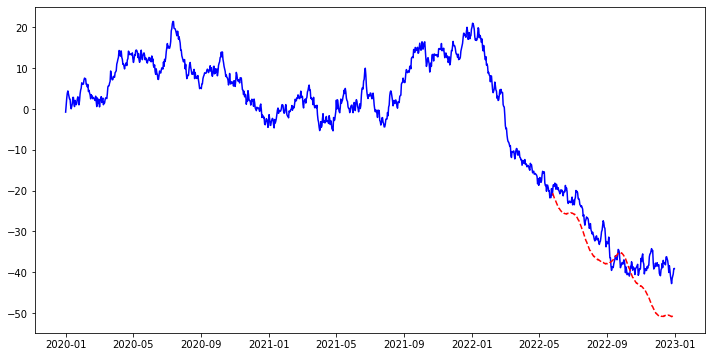

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from merlion.utils import TimeSeries
from merlion.models.forecast.prophet import Prophet, ProphetConfig
from merlion.evaluate.forecast import ForecastEvaluator, ForecastEvaluatorConfig

# Create some sample data
dates = pd.date_range(start='2020-01-01', end='2022-12-31', freq='D')
values = np.random.randn(len(dates)).cumsum()  # random walk

# Create a DataFrame
df = pd.DataFrame({'timestamp': dates, 'value': values})
df.set_index('timestamp', inplace=True)

# Convert to Merlion TimeSeries
ts = TimeSeries.from_pd(df)

# Split the data into train and test sets
train_data = ts[:int(0.8 * len(ts))]
test_data = ts[int(0.8 * len(ts)):]

# Initialize a Prophet configuration
prophet_config = ProphetConfig()

# Initialize a Prophet model with the configuration
model = Prophet(prophet_config)

# Train the model
model.train(train_data)

# Get the last timestamp from the training data
last_timestamp = train_data.time_stamps[-1]

# Create a sequence of future timestamps
future_timestamps = np.arange(
    last_timestamp + 86400,  # Start from the day after last training timestamp
    last_timestamp + 86400 * (len(test_data) + 1),
    86400  # Increment by one day (86400 seconds)
)

# Make predictions
forecast_tuple = model.forecast(time_stamps=future_timestamps)
forecast = forecast_tuple[0]  # Assuming the first element is the forecast TimeSeries

# Create a ForecastEvaluatorConfig
eval_config = ForecastEvaluatorConfig()

# Initialize the evaluator with the model and config
evaluator = ForecastEvaluator(model, eval_config)

# Evaluate the model
eval_result = evaluator.evaluate(ground_truth=test_data, predict=forecast)

print(eval_result)

# Plot the original data and forecast
plt.figure(figsize=(12, 6))
plt.plot(ts.to_pd(), label="Actual", color='blue')
plt.plot(forecast.to_pd(), label="Forecast", linestyle="--", color='red')

# Calculate a simple confidence interval (you might want to adjust this)
confidence_interval = forecast.to_pd().std() * 1.96
plt.fill_between(
    forecast.to_pd().index,
    forecast.to_pd().iloc[:, 0] - confidence_interval,
    forecast.to_pd().iloc[:, 0] + confidence_interval,
    color="gray",
    alpha=0.3,
    label="Confidence Interval",
)

plt.title("Time Series Forecast")
plt.xlabel("Date")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from merlion.utils import TimeSeries
from merlion.models.forecast.arima import Arima
from merlion.models.forecast.prophet import Prophet
from merlion.evaluate.forecast import ForecastEvaluator

# Create sample data
np.random.seed(42)
dates = pd.date_range(start='2020-01-01', end='2022-12-31', freq='D')
trend = np.linspace(0, 10, len(dates))
seasonality = 5 * np.sin(np.arange(len(dates)) * 2 * np.pi / 365)
noise = np.random.normal(0, 1, len(dates))
values = trend + seasonality + noise

# Create a DataFrame and convert to Merlion TimeSeries
df = pd.DataFrame({'timestamp': dates, 'value': values})
df.set_index('timestamp', inplace=True)
ts = TimeSeries.from_pd(df)

# Split the data into train and test sets
train_data = ts[:-365]
test_data = ts[-365:]

# Function to train, forecast, and evaluate a model
def train_and_forecast(model, train_data, test_data):
    model.train(train_data)
    forecast = model.forecast(time_stamps=test_data.time_stamps)
    evaluator = ForecastEvaluator(model)
    eval_result = evaluator.evaluate(ground_truth=test_data, predict=forecast)
    return forecast, eval_result

# ARIMA model
arima_model = Arima(order=(1, 1, 1))
arima_forecast, arima_eval = train_and_forecast(arima_model, train_data, test_data)

# Prophet model
prophet_model = Prophet()
prophet_forecast, prophet_eval = train_and_forecast(prophet_model, train_data, test_data)

# Visualization
plt.figure(figsize=(15, 10))

# Plot training data
plt.plot(train_data.to_pd(), label='Training Data', color='blue')

# Plot test data
plt.plot(test_data.to_pd(), label='Test Data', color='green')

# Plot ARIMA forecast
plt.plot(arima_forecast.to_pd(), label='ARIMA Forecast', color='red', linestyle='--')

# Plot Prophet forecast
plt.plot(prophet_forecast.to_pd(), label='Prophet Forecast', color='purple', linestyle='--')

plt.title('Time Series Forecasting: ARIMA vs Prophet')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Print evaluation results
print("ARIMA Evaluation:")
print(arima_eval)
print("\nProphet Evaluation:")
print(prophet_eval)


TypeError: __init__() got an unexpected keyword argument 'order'

In [42]:
from merlion.utils import TimeSeries
from merlion.ts_datasets.forecast import M4

# Data loader returns pandas DataFrames, which we convert to Merlion TimeSeries
time_series, metadata = M4(subset="Hourly")[0]
train_data = TimeSeries.from_pd(time_series[metadata.trainval])
test_data = TimeSeries.from_pd(time_series[~metadata.trainval])
"""We can then initialize and train Merlion’s DefaultForecaster, which is an forecasting model that balances performance with efficiency. We also obtain its predictions on the test split.
"""
from merlion.models.defaults import DefaultForecasterConfig, DefaultForecaster
model = DefaultForecaster(DefaultForecasterConfig())
model.train(train_data=train_data)
test_pred, test_err = model.forecast(time_stamps=test_data.time_stamps)
"""Next, we visualize the model’s predictions.
"""
import matplotlib.pyplot as plt
fig, ax = model.plot_forecast(time_series=test_data, plot_forecast_uncertainty=True)
plt.show()

"""Finally, we quantitatively evaluate the model. sMAPE measures the error of the prediction on a scale of 0 to 100 (lower is better), while MSIS evaluates the quality of the 95% confidence band on a scale of 0 to 100 (lower is better).
"""
# Evaluate the model's predictions quantitatively
from scipy.stats import norm
from merlion.evaluate.forecast import ForecastMetric

# Compute the sMAPE of the predictions (0 to 100, smaller is better)
smape = ForecastMetric.sMAPE.value(ground_truth=test_data, predict=test_pred)

# Compute the MSIS of the model's 95% confidence interval (0 to 100, smaller is better)
lb = TimeSeries.from_pd(test_pred.to_pd() + norm.ppf(0.025) * test_err.to_pd().values)
ub = TimeSeries.from_pd(test_pred.to_pd() + norm.ppf(0.975) * test_err.to_pd().values)
msis = ForecastMetric.MSIS.value(ground_truth=test_data, predict=test_pred,
                                 insample=train_data, lb=lb, ub=ub)
print(f"sMAPE: {smape:.4f}, MSIS: {msis:.4f}")

ModuleNotFoundError: No module named 'merlion.ts_datasets'

In [43]:
! pip install -e ts_datasets/

ERROR: ts_datasets/ is not a valid editable requirement. It should either be a path to a local project or a VCS URL (beginning with bzr+http, bzr+https, bzr+ssh, bzr+sftp, bzr+ftp, bzr+lp, bzr+file, git+http, git+https, git+ssh, git+git, git+file, hg+file, hg+http, hg+https, hg+ssh, hg+static-http, svn+ssh, svn+http, svn+https, svn+svn, svn+file).
